In [1]:
import metrics_helpers as indicators
import pickle as pk
import gc
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def dt_to_int(dt): #datetime to integer
    return dt.astype('int')/(10**9)

In [3]:

#open the facebook data
with open('fb_merged_cleaned_flat.pkl', 'rb') as f:
    fb_search = pk.load(f)

#facebook


indicators.add_term_counts(fb_search, fb=True)
indicators.add_url_term_counts(fb_search, fb=True)
indicators.add_total_likes(fb_search, fb=True)
indicators.add_available_comments(fb_search, fb=True)
indicators.add_comment_activity(fb_search, fb=True)
indicators.add_num_unique_posters(fb_search, fb=True)
indicators.add_num_urls(fb_search, fb=True)
indicators.add_avg_comment_length(fb_search)
indicators.add_avg_post_length(fb_search, fb=True)
indicators.add_post_time(fb_search, fb=True)
indicators.add_post_language(fb_search, fb=True)
indicators.add_lexical_richness(fb_search, fb=True)

/usr/local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
#netmums


with open('/Users/sma/Documents/INRAE internship/scrape-git/netmums/allposts_rerun.pkl', 'rb') as f:
    netmums = pk.load(f)

#this one takes long, around 20 seconds I think.

indicators.add_term_counts(netmums, fb=False)
indicators.add_url_term_counts(netmums, fb=False)
indicators.add_total_likes(netmums, fb=False)
indicators.add_available_comments(netmums, fb=False)
indicators.add_comment_activity(netmums, fb=False)
indicators.add_num_unique_posters(netmums, fb=False)
indicators.add_num_urls(netmums, fb=False)
indicators.add_avg_post_length(netmums, fb=False)
indicators.add_post_time(netmums, fb=False)
indicators.add_lexical_richness(netmums, fb=False)

In [5]:
import pandas as pd

In [6]:
nmdf = pd.DataFrame.from_dict(netmums).transpose()
nmdf = nmdf.drop(columns=['posts', 'term_counts', 'url_term_counts', 'query'])

## move term counts to separate columns

### netmums

In [7]:
terms = list([n for n in netmums.values()][0]['term_counts'].keys())

for term_key in terms:
    d = {url_key: value['term_counts'][term_key] for url_key, value in netmums.items()}
    nmdf['term_counts_' + term_key] = nmdf.index.map(d)
    
for term_key in terms:
    d = {url_key: value['url_term_counts'][term_key] for url_key, value in netmums.items()}
    nmdf['url_term_counts_'+ term_key] = nmdf.index.map(d)

In [8]:
nmdf = nmdf.reset_index()
nmdf = nmdf.rename(columns={"index":"url"})
nmdf

,url,title,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,lexical_richness,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
0,https://www.netmums.com/coffeehouse/drop-clini...,Aptamil Hungry Baby making LO sick??,0,20,20,2,4,929.1,2011-10-30 08:56:00,141.759,...,0,0,0,0,0,0,0,0,0,0
1,https://www.netmums.com/coffeehouse/becoming-m...,Mam bottles,0,17,17,5,0,200.353,2016-01-20 12:41:00,120.208,...,0,0,0,0,0,0,0,0,0,0
2,https://www.netmums.com/coffeehouse/other-chat...,DEAD INSECT IN SAINSBURYS FOOD!,0,30,30,9,0,213.8,2012-02-19 19:55:00,190.436,...,0,0,0,0,0,0,0,0,0,0
3,https://www.netmums.com/coffeehouse/home-garde...,buying a house near a factory is it a bad idea?,0,5,5,3,1,534,2017-09-04 21:13:00,133.82,...,0,0,0,0,0,0,0,0,0,0
4,https://www.netmums.com/coffeehouse/home-garde...,URGENT ADVISE NEEDED PLEASE - oven cleaner fumes,0,5,5,1,0,228.8,2007-11-18 22:51:00,99.834,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,https://www.netmums.com/coffeehouse/becoming-m...,Thrush treatment in late pregnancy,0,14,14,2,0,337.071,2011-05-02 19:12:00,112.864,...,0,0,0,0,0,0,0,0,0,0
6519,https://www.netmums.com/coffeehouse/becoming-m...,Does anyone know .............,0,12,12,2,0,260.583,2014-07-29 22:25:00,155.432,...,0,0,0,0,0,0,0,0,0,0
6520,https://www.netmums.com/coffeehouse/being-mum-...,kids shopping trolleys,0,7,7,1,0,327,2012-04-13 18:47:00,141.132,...,0,0,0,0,0,0,0,0,0,0
6521,https://www.netmums.com/coffeehouse/other-chat...,Halloween food ideas,0,12,12,9,6,483.083,2016-10-31 20:20:00,138.818,...,0,0,0,0,0,0,0,0,0,0


### facebook

In [9]:
fbdf = pd.DataFrame.from_dict(fb_search).transpose()
fbdf = fbdf.drop(columns=['data', 'term_counts', 'url_term_counts', 'query'])

terms = list([n for n in fb_search.values()][0]['term_counts'].keys())

for term_key in terms:
    d = {url_key: value['term_counts'][term_key] for url_key, value in fb_search.items()}
    fbdf['term_counts_' + term_key] = fbdf.index.map(d)
    
for term_key in terms:
    d = {url_key: value['url_term_counts'][term_key] for url_key, value in fb_search.items()}
    fbdf['url_term_counts_'+ term_key] = fbdf.index.map(d)
    
fbdf = fbdf.reset_index()
fbdf = fbdf.rename(columns={"index":"url"})
fbdf

,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,lexical_richness,...,url_term_counts_toxic,url_term_counts_toxin,url_term_counts_veg,url_term_counts_vegetable,url_term_counts_veggie,url_term_counts_vet,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt
0,https://www.facebook.com/SGiMED/posts/looks-li...,0,0,0,1,4,874,2017-07-05 15:03:00,"(ENGLISH, en, 99, 992.0)",152.46,...,0,0,0,0,0,0,0,0,0,0
1,https://www.facebook.com/115916103439458/posts...,0,1,1,2,0,243,2020-07-12 10:18:00,"(ENGLISH, en, 99, 917.0)",78.4467,...,0,0,0,0,0,0,0,0,0,0
2,https://www.facebook.com/115169316933829/posts...,0,0,0,1,0,53,2020-10-01 08:33:00,"(ENGLISH, en, 56, 548.0)",23.66,...,0,0,0,0,0,0,0,0,0,0
3,https://www.facebook.com/PannKaungShweSinFoodA...,2,0,0,1,0,NaN,2020-11-28 16:53:00,"(Unknown, un, 0, 0.0)",0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.facebook.com/HZGlobalFruits/posts/...,260,37,37,36,116,4416,2019-11-11 06:15:00,"(ENGLISH, en, 94, 836.0)",52.1538,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777,https://facebook.com/story.php?story_fbid=1594...,5,0,0,1,4,598,2020-12-15 04:00:00,"(ENGLISH, en, 99, 929.0)",128,...,0,0,0,0,0,0,0,0,0,0
6778,https://facebook.com/story.php?story_fbid=1593...,5,0,0,1,4,619,2020-12-14 04:10:00,"(ENGLISH, en, 99, 969.0)",197.12,...,0,0,0,0,0,0,0,0,0,0
6779,https://facebook.com/story.php?story_fbid=1593...,12,1,1,2,4,588,2020-12-13 18:53:00,"(ENGLISH, en, 99, 855.0)",246.96,...,0,0,0,0,0,0,0,0,0,0
6780,https://facebook.com/story.php?story_fbid=1559...,69,5,6,6,2,753,2020-11-03 11:48:00,"(ENGLISH, en, 99, 1076.0)",241.92,...,0,0,0,0,0,0,0,0,0,0


In [10]:
gc.collect()

20

## Create two term totals
combine counts for terms which are hazards and terms which are products.

In [11]:
#choose terms to count in totals
term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('term_counts_')]]

products = term_count_df.columns[[5,12,13,17,33, 34, 35, 44,45,57, 58, 65,66,68, 69,70,78, 79,80, 85]]
hazards = term_count_df.columns[[1,2,3,9,10,11,14,15,16,18,
                                 19,20,21,22,23,24,25,26,27,
                                 28,30,31,37,38,39,40,
                                 41,42,43,46,47,48,49,50,51,
                                 52,53,54,55,56,59,60,61,62,
                                 63,64,67,71,72,73,74,75,76,
                                 77,81,82,83,84]]


In [12]:
hazards

Index(['term_counts_acrylamid', 'term_counts_acrylamide',
       'term_counts_additives', 'term_counts_bacteria',
       'term_counts_biphenyls', 'term_counts_bisphenol', 'term_counts_bpa',
       'term_counts_campylobacter', 'term_counts_carcinogen',
       'term_counts_chemical', 'term_counts_chemicals',
       'term_counts_contaminants', 'term_counts_contaminated',
       'term_counts_cronobacter', 'term_counts_deoxynivalenol',
       'term_counts_dioxin', 'term_counts_disruptor', 'term_counts_drugs',
       'term_counts_e-coli', 'term_counts_ecoli', 'term_counts_endocrine',
       'term_counts_estrogen', 'term_counts_fungus', 'term_counts_genetically',
       'term_counts_gm', 'term_counts_gmo', 'term_counts_hazard',
       'term_counts_histamine', 'term_counts_hydrocarbons',
       'term_counts_listeria', 'term_counts_metals', 'term_counts_microbes',
       'term_counts_microbiologic', 'term_counts_moah', 'term_counts_modified',
       'term_counts_moh', 'term_counts_mold', 'term_

In [13]:
products

Index(['term_counts_applesauce', 'term_counts_bottle',
       'term_counts_bottle-fed', 'term_counts_cereal', 'term_counts_food',
       'term_counts_for', 'term_counts_formula', 'term_counts_jar',
       'term_counts_jarred', 'term_counts_oatmeal', 'term_counts_oats',
       'term_counts_porridge', 'term_counts_premade', 'term_counts_pudding',
       'term_counts_puree', 'term_counts_purée', 'term_counts_veg',
       'term_counts_vegetable', 'term_counts_veggie', 'term_counts_yoghurt'],
      dtype='object')

create the totals of terms in two categories.

In [14]:
#netmums
#add totals
term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('term_counts_')]]

products = term_count_df.columns[[5,12,13,17,33, 34, 35, 44,45,57, 58, 65,66,68, 69,70,78, 79,80, 85]]
hazards = term_count_df.columns[[1,2,3,4,6,7,8,9,10,11,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,46,47,48,49,50,51,52,53,54,55,56,59,60,61,62,63,64,67,71,72,73,74,75,76,77,81,82,83,84]]


term_count_hazard_df = term_count_df[hazards]
term_count_product_df = term_count_df[products]

url_term_count_df = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.startswith('url_term_counts_')]]

url_term_count_hazard_df = url_term_count_df['url_' + hazards]
url_term_count_product_df = url_term_count_df['url_' + products] 


nmdf['total_term_count'] = term_count_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count'] = term_count_df.sum(axis=1)

nmdf['total_term_count_hazard'] = term_count_hazard_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count_hazard'] = url_term_count_hazard_df.sum(axis=1)

nmdf['total_term_count_product'] = term_count_product_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
nmdf['total_url_term_count_product'] = url_term_count_product_df.sum(axis=1)

In [16]:
# facebook

#add totals
term_count_df = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.startswith('term_counts_')]]

term_count_hazard_df = term_count_df[hazards]
term_count_product_df = term_count_df[products]

url_term_count_hazard_df = url_term_count_df['url_' + hazards]
url_term_count_product_df = url_term_count_df['url_' + products]

url_term_count_df = fbdf[fbdf.columns[pd.Series(fbdf.columns).str.startswith('url_term_counts_')]]

fbdf['total_term_count'] = term_count_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count'] = term_count_df.sum(axis=1)

fbdf['total_term_count_hazard'] = term_count_hazard_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count_hazard'] = url_term_count_hazard_df.sum(axis=1)

fbdf['total_term_count_product'] = term_count_product_df.sum(axis=1) #make sure there's no s because we can easily filter the non totals then with contains.
fbdf['total_url_term_count_product'] = url_term_count_product_df.sum(axis=1)

### Facebook Only: Choose only English Results

check the lowest scoring english categories to see if they are indeed english.

According to this source, I believe the last number is a score. https://github.com/aboSamoor/pycld2/blob/e3ac86ed4d4902e912691c1531d0c5645382a726/bindings/pycldmodule.cc

PyObject *details = PyTuple_New(3);
  for (Py_ssize_t idx = 0; idx < 3; idx++) {
    CLD2::Language lang = language3[idx];
    // Steals ref
    PyTuple_SET_ITEM(details,
                     idx,
                     Py_BuildValue("(ssif)",
                                   CLD2::LanguageName(lang),
                                   CLD2::LanguageCode(lang),
                                   percent3[idx],
                                   normalized_score3[idx]))

In [26]:
english_fb_view = fbdf.loc[fbdf.post_language.str[0].str.contains('ENGLISH') == 1]

#we sort by the size of the range detected as english. the last two numbers are the range of bits which 
#were detected as english.
fbdf = english_fb_view.loc[english_fb_view.post_language.str[3].sort_values().index]
fbdf


,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,lexical_richness,...,url_term_counts_veterinary,url_term_counts_virus,url_term_counts_vomitoxin,url_term_counts_yoghurt,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product
1744,https://facebook.com/story.php?story_fbid=1776...,1,0,0,1,2,241,2018-01-28 14:58:00,"(ENGLISH, en, 98, 109.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
5918,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
5917,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0,1.0,0,0.0
5916,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:13:00,"(ENGLISH, en, 98, 126.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
6299,https://facebook.com/story.php?story_fbid=1535...,5,1,1,2,0,NaN,2015-01-01 06:38:00,"(ENGLISH, en, 83, 204.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,https://facebook.com/story.php?story_fbid=7049...,12,0,0,1,2,71,2020-09-17 13:37:00,"(ENGLISH, en, 95, 2092.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
2289,https://facebook.com/story.php?story_fbid=1612...,1,0,0,1,0,23,2021-03-16 09:00:00,"(ENGLISH, en, 95, 2096.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0
2270,https://facebook.com/story.php?story_fbid=1642...,1,0,0,1,0,13,2021-04-26 19:17:00,"(ENGLISH, en, 90, 2252.0)",2.52,...,0,0,0,0,0,0,0,0.0,0,0.0
3535,https://facebook.com/story.php?story_fbid=1581...,3,1,1,2,0,NaN,2017-11-06 19:56:00,"(ENGLISH, en, 80, 2304.0)",0,...,0,0,0,0,0,0,0,0.0,0,0.0


it seems to work pretty well! It's all english!. so roughtly 90% of results are english


## Examine the Pandas Dataframes.

In [18]:
#we want to plot these
nmdf[nmdf.columns[pd.Series(nmdf.columns).str.contains('term_counts_') == 0]].drop(['url','title'],axis=1)

,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,lexical_richness,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product
0,0,20,20,2,4,929.1,2011-10-30 08:56:00,141.759,68,68,38,0,30,0
1,0,17,17,5,0,200.353,2016-01-20 12:41:00,120.208,4,4,2,0,2,0
2,0,30,30,9,0,213.8,2012-02-19 19:55:00,190.436,28,28,15,0,13,0
3,0,5,5,3,1,534,2017-09-04 21:13:00,133.82,4,4,4,0,0,0
4,0,5,5,1,0,228.8,2007-11-18 22:51:00,99.834,2,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,0,14,14,2,0,337.071,2011-05-02 19:12:00,112.864,4,4,2,0,2,0
6519,0,12,12,2,0,260.583,2014-07-29 22:25:00,155.432,4,4,3,0,1,0
6520,0,7,7,1,0,327,2012-04-13 18:47:00,141.132,2,2,1,0,1,0
6521,0,12,12,9,6,483.083,2016-10-31 20:20:00,138.818,8,8,1,0,7,0


In [27]:
fbdf[fbdf.columns[pd.Series(fbdf.columns).str.contains('term_counts_') == 0]]

,url,total_likes,available_comments,comment_activity,num_unique_posters,num_urls,avg_post_length,post_time,post_language,lexical_richness,avg_comment_length,total_term_count,total_url_term_count,total_term_count_hazard,total_url_term_count_hazard,total_term_count_product,total_url_term_count_product
1744,https://facebook.com/story.php?story_fbid=1776...,1,0,0,1,2,241,2018-01-28 14:58:00,"(ENGLISH, en, 98, 109.0)",0,NaN,0,0,0,0.0,0,0.0
5918,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,NaN,0,0,0,0.0,0,0.0
5917,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:12:00,"(ENGLISH, en, 98, 126.0)",0,NaN,0,0,0,1.0,0,0.0
5916,https://facebook.com/story.php?story_fbid=2214...,0,0,0,1,0,77,2020-02-29 22:13:00,"(ENGLISH, en, 98, 126.0)",0,NaN,0,0,0,0.0,0,0.0
6299,https://facebook.com/story.php?story_fbid=1535...,5,1,1,2,0,NaN,2015-01-01 06:38:00,"(ENGLISH, en, 83, 204.0)",0,4,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,https://facebook.com/story.php?story_fbid=7049...,12,0,0,1,2,71,2020-09-17 13:37:00,"(ENGLISH, en, 95, 2092.0)",0,NaN,0,0,0,0.0,0,0.0
2289,https://facebook.com/story.php?story_fbid=1612...,1,0,0,1,0,23,2021-03-16 09:00:00,"(ENGLISH, en, 95, 2096.0)",0,NaN,0,0,0,0.0,0,0.0
2270,https://facebook.com/story.php?story_fbid=1642...,1,0,0,1,0,13,2021-04-26 19:17:00,"(ENGLISH, en, 90, 2252.0)",2.52,NaN,0,0,0,0.0,0,0.0
3535,https://facebook.com/story.php?story_fbid=1581...,3,1,1,2,0,NaN,2017-11-06 19:56:00,"(ENGLISH, en, 80, 2304.0)",0,3,0,0,0,0.0,0,0.0


In [28]:
gc.collect()

84

## Modify Time so We can Graph It.

In [29]:
from datetime import datetime
nmdf['int_post_time'] = dt_to_int(nmdf.post_time.dropna()) 
fbdf['int_post_time'] = dt_to_int(fbdf.post_time.dropna()) 

# Pair Plots

Take a sample of 500 points and plot the pair plots of our indicators.
Datetime could not be plotted, so it's converted to int. We can estimate on the graph what the corresponding date is by looking at quantiles.
Lexical richness uses a measure called MTLD, which should be less biased for short documents than the most common TTR (Type-Token Ratio)

## Netmums

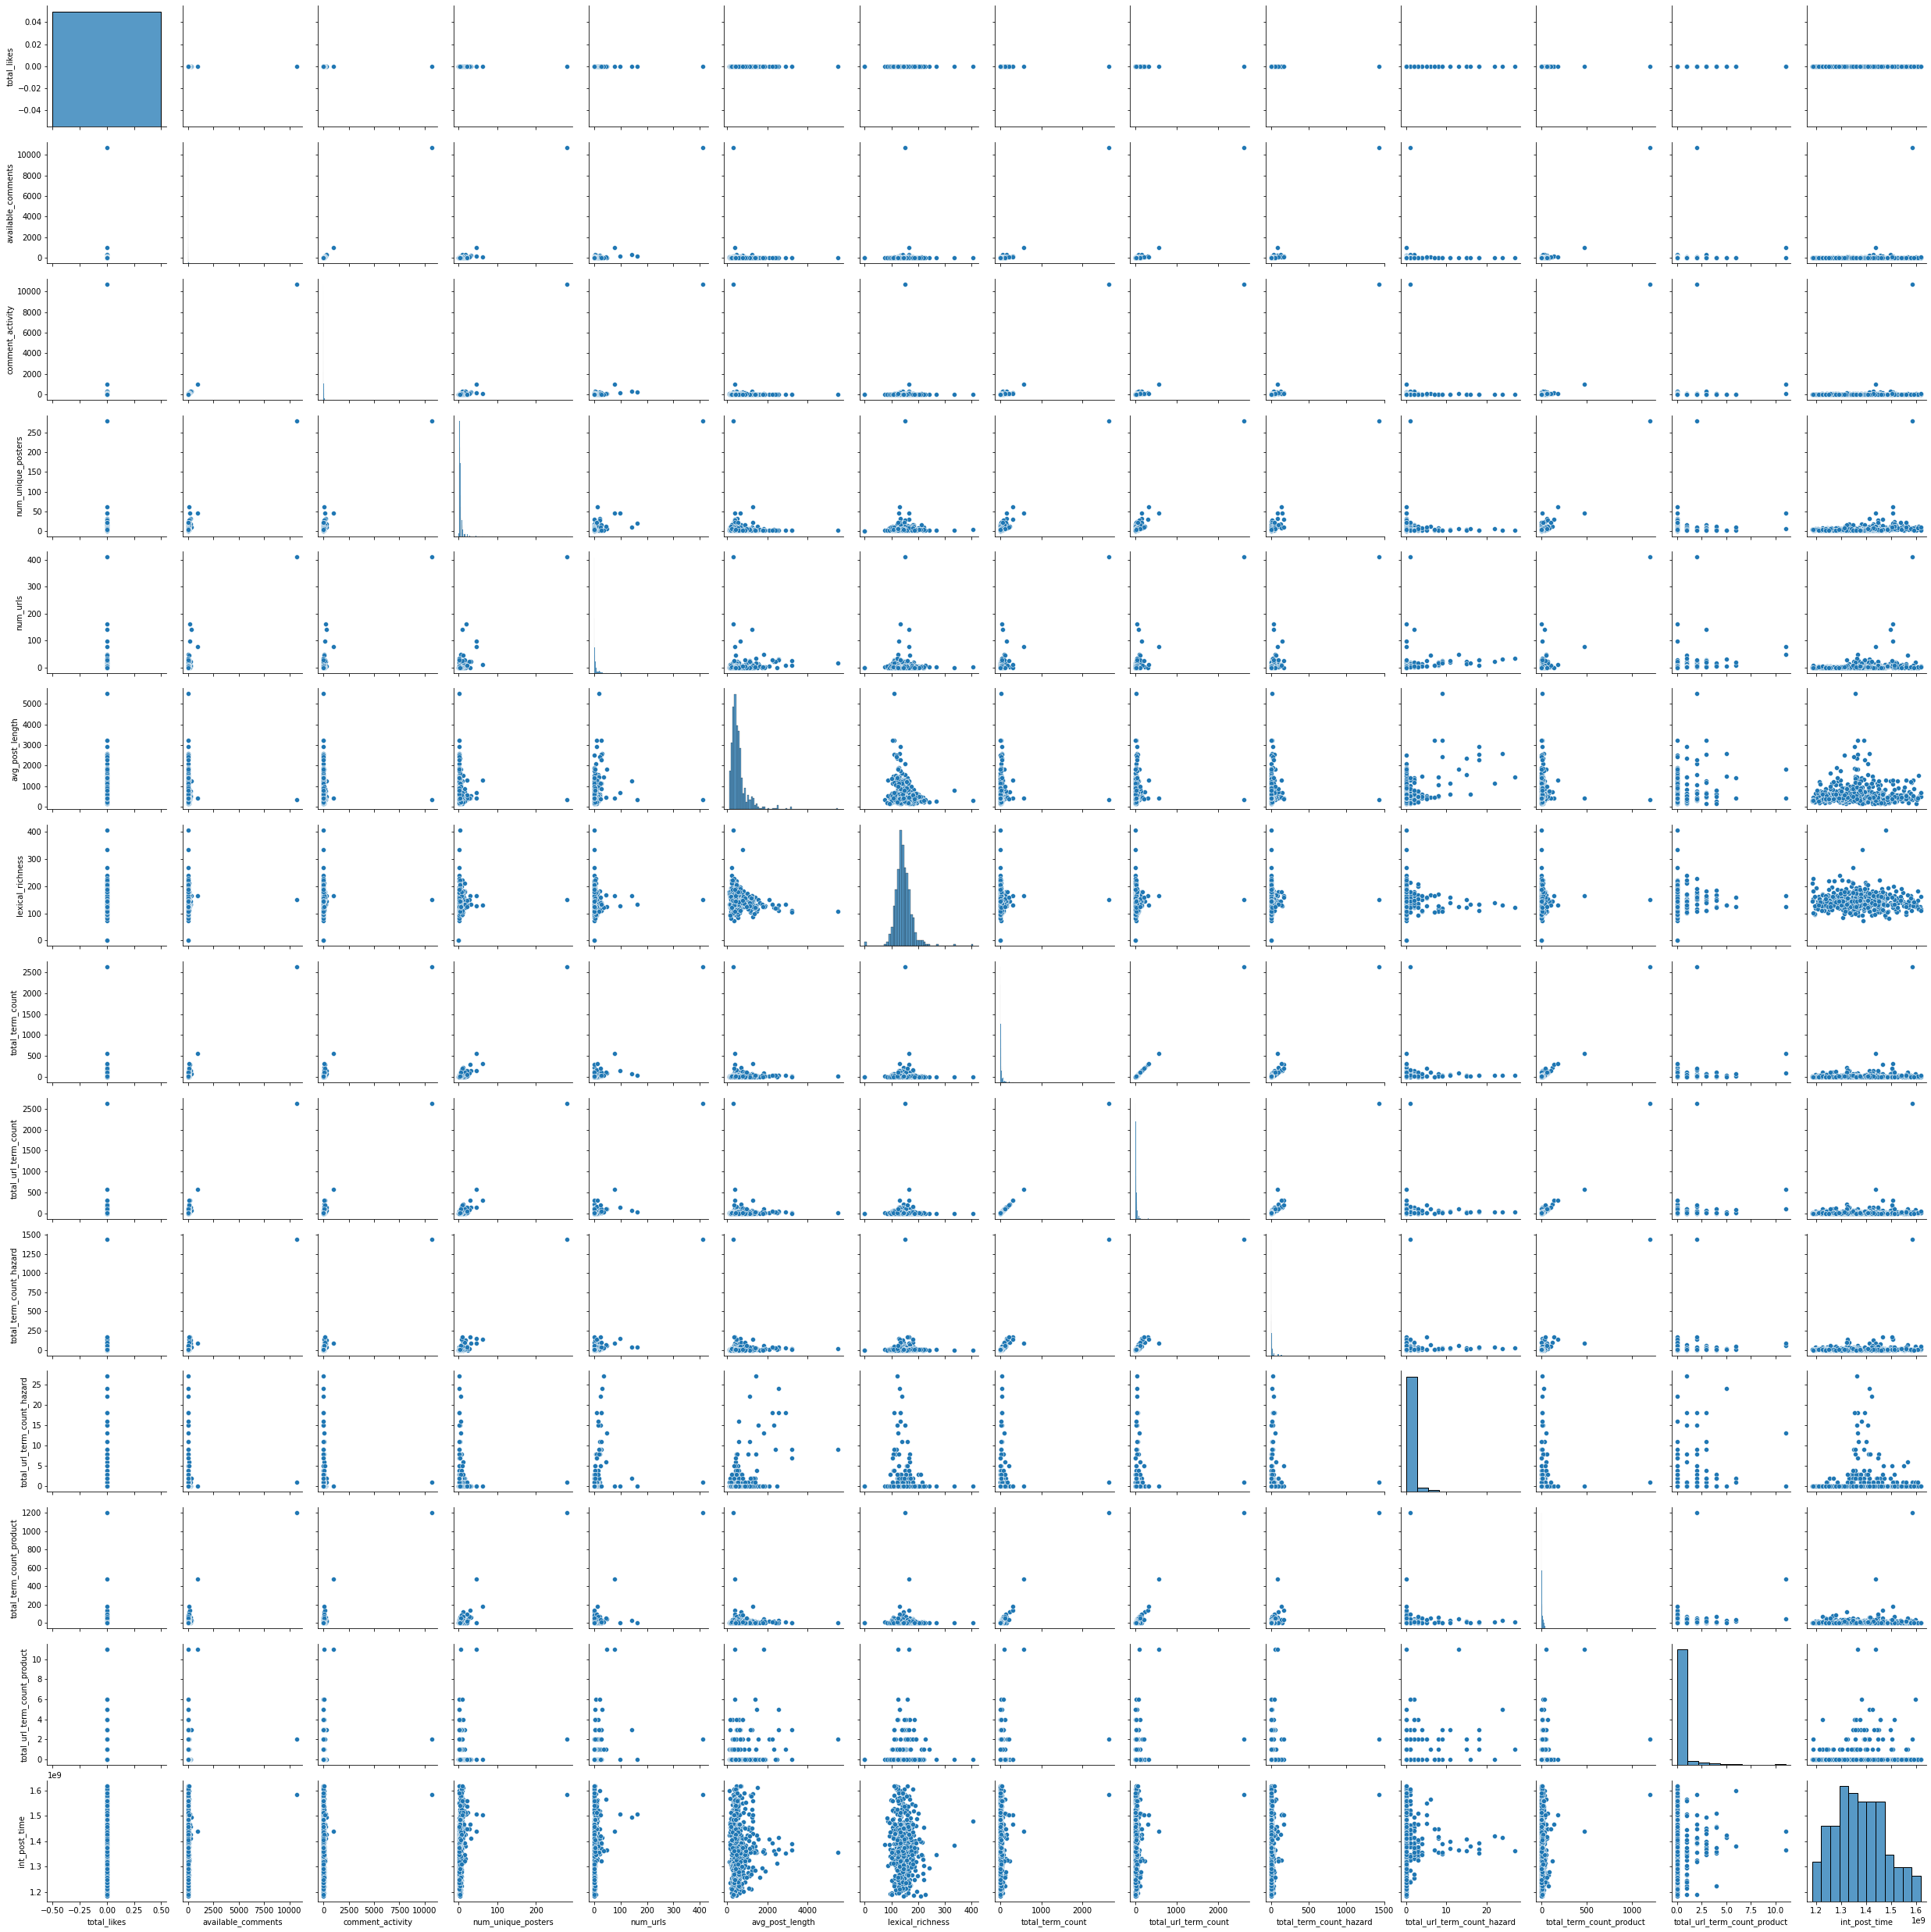

In [30]:
sample = nmdf[nmdf.columns[pd.Series(nmdf.columns).str.contains('term_counts_') == 0]].drop(['url','title'],axis=1).sample(500)
sns.pairplot(sample)

### Graph of Only Term Counts

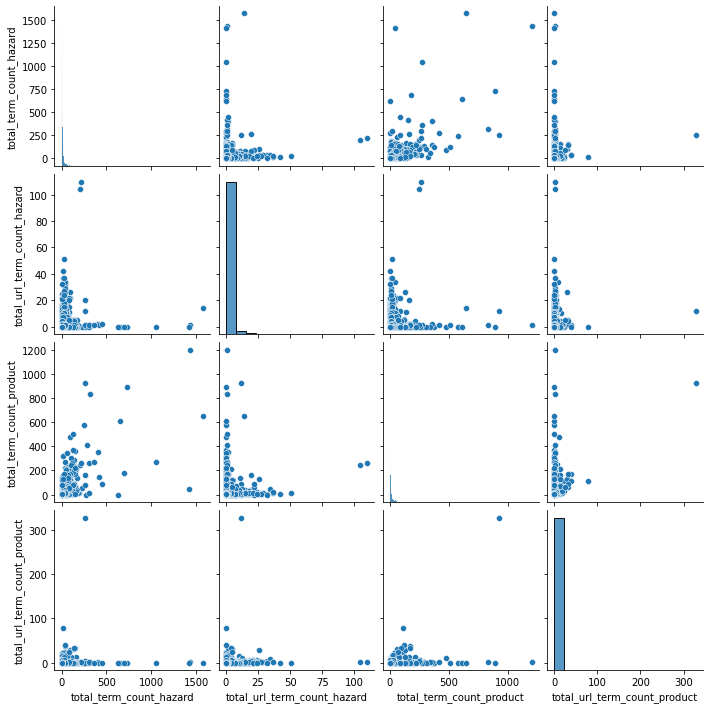

In [31]:
temp = nmdf.loc[:,'total_term_count_hazard':'total_url_term_count_product']

#remove outliers for better visual
sns.pairplot(temp[pd.Series(temp.total_term_count_hazard) <= 2000])

## Facebook

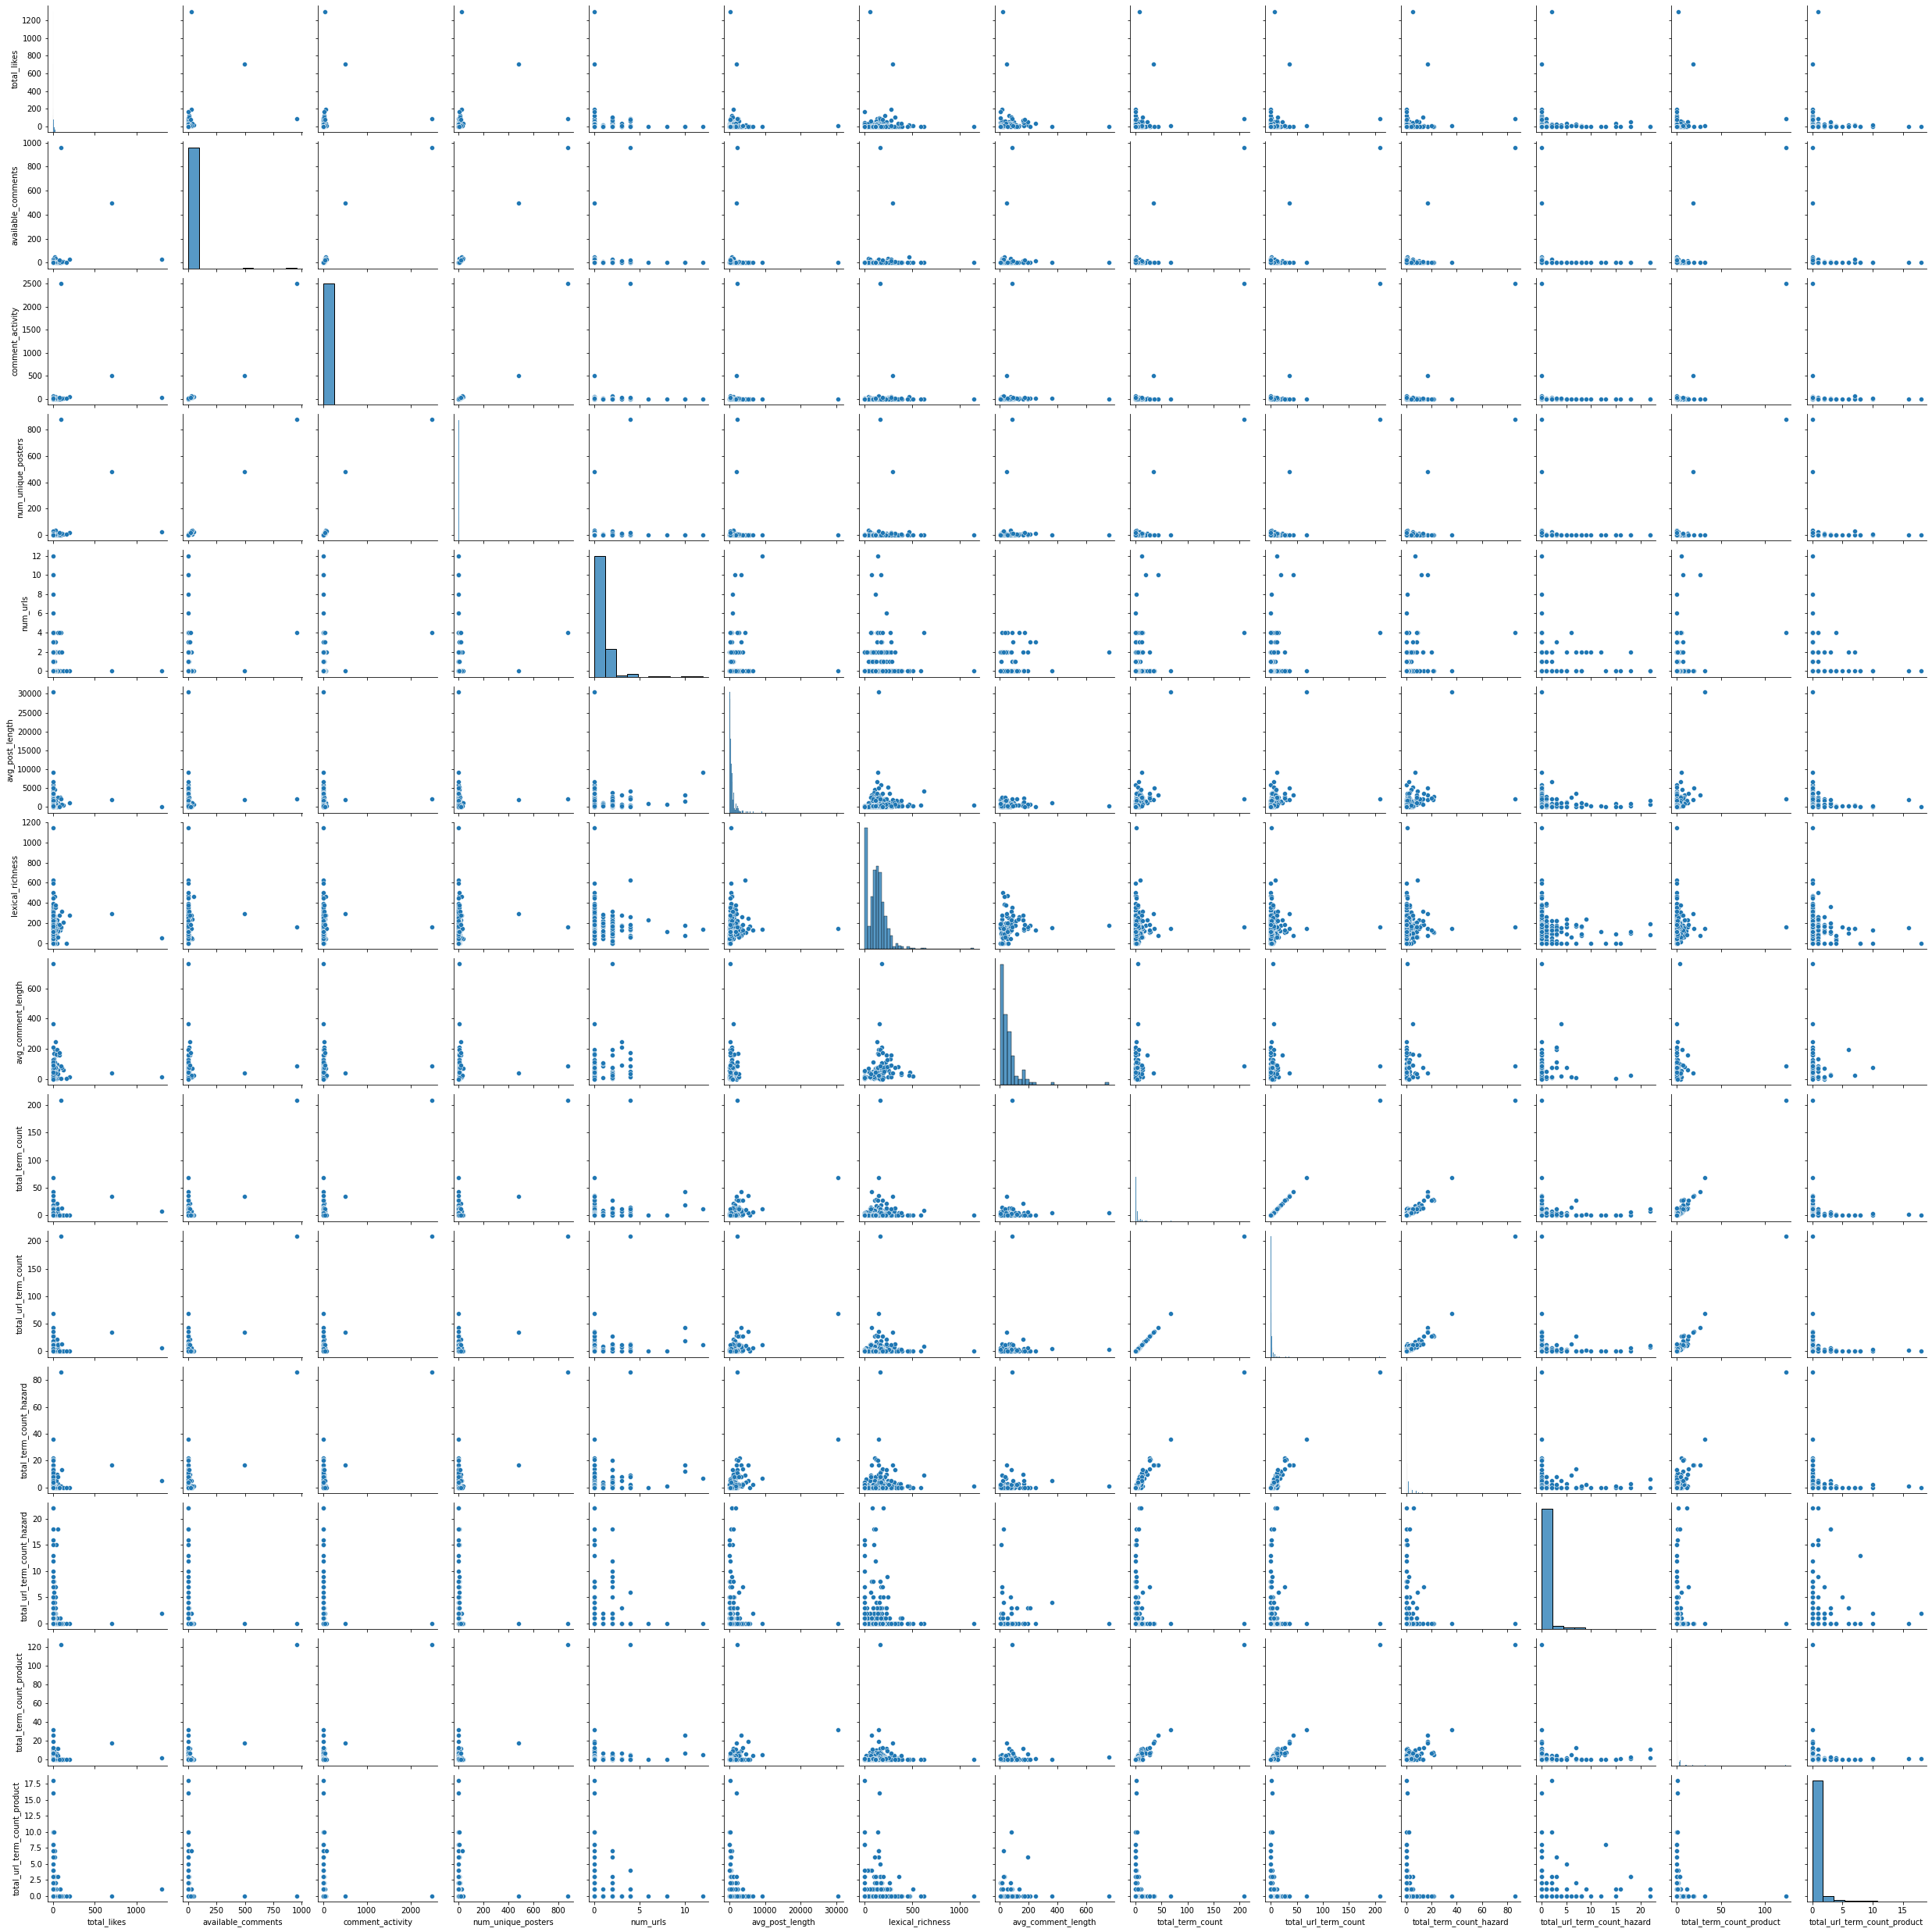

In [32]:
fb_sample = fbdf[fbdf.columns[pd.Series(english_fb_view.columns).str.contains('term_counts_') == 0]].drop(['url'],axis=1).sample(500)
sns.pairplot(fb_sample)

### Graph of Only Term Counts

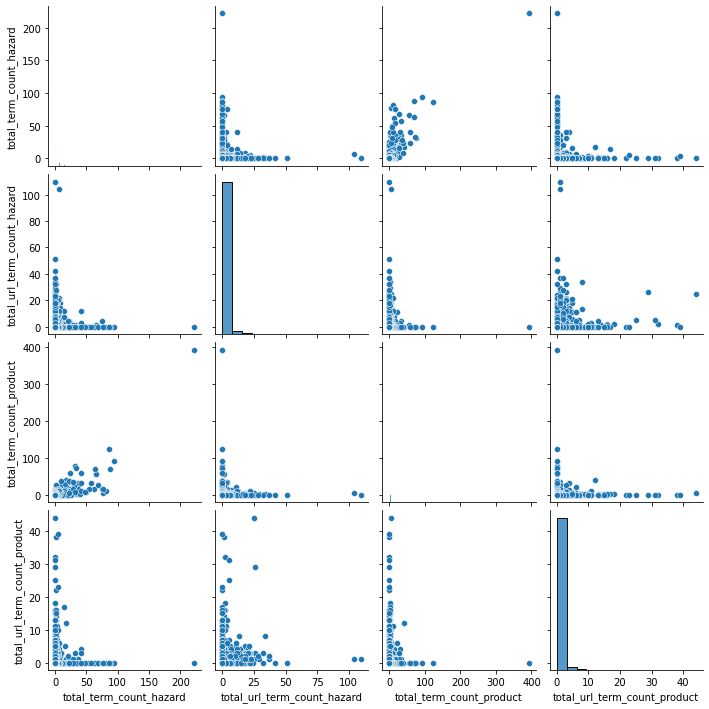

In [33]:
temp = fbdf.loc[:,'total_term_count_hazard':'total_url_term_count_product']

#remove outlier for better visual
sns.pairplot(temp[pd.Series(temp.total_term_count_hazard) <= 2000])

# Basic Descriptive Statistics


In [70]:
nm_indicators = \
['term_counts',
'url_term_counts',
'total_likes',
'available_comments',
'comment_activity',
'num_unique_posters',
'num_urls',
'avg_post_length',
'int_post_time',
'lexical_richness', 
'total_term_count_hazard',
'total_url_term_count_hazard',
'total_term_count_product',
'total_url_term_count_product']

fb_indicators = \
['term_counts',
'url_term_counts',
'total_likes',
'available_comments',
'comment_activity',
'num_unique_posters',
'num_urls',
'avg_comme',
'avg_post_length',
'int_post_time',
'lexical_richness', 
'total_term_count_hazard',
'total_url_term_count_hazard',
'total_term_count_product',
'total_url_term_count_product']

## Netmums

In [71]:
nmdf.columns[nmdf.columns.isin(nm_indicators)] #list like

Index(['total_likes', 'available_comments', 'comment_activity',
       'num_unique_posters', 'num_urls', 'avg_post_length', 'lexical_richness',
       'total_term_count_hazard', 'total_url_term_count_hazard',
       'total_term_count_product', 'total_url_term_count_product',
       'int_post_time'],
      dtype='object')

### Quantiles

In [82]:
{str(indicator): np.quantile(nmdf[indicator], [0.25,0.5,0.75]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}

{'total_likes': array([0.0, 0.0, 0.0], dtype=object),
 'available_comments': array([8.0, 12.0, 22.0], dtype=object),
 'comment_activity': array([8.0, 12.0, 22.0], dtype=object),
 'num_unique_posters': array([2.0, 3.0, 6.0], dtype=object),
 'num_urls': array([0.0, 1.0, 4.0], dtype=object),
 'avg_post_length': array([325.1, 464.7111111111111, 667.1683087027915], dtype=object),
 'lexical_richness': array([127.41575005463598, 143.6799703454014, 160.69062455425848],
       dtype=object),
 'total_term_count_hazard': array([ 2.,  5., 11.]),
 'total_url_term_count_hazard': array([0., 0., 0.]),
 'total_term_count_product': array([ 1.,  4., 11.]),
 'total_url_term_count_product': array([0., 0., 0.]),
 'int_post_time': array([nan, nan, nan])}

### Means

In [97]:
{str(indicator): np.mean(nmdf[indicator]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}


{'total_likes': 0.0,
 'available_comments': 37.67438295262916,
 'comment_activity': 37.67438295262916,
 'num_unique_posters': 5.388931473248506,
 'num_urls': 6.144718687720374,
 'avg_post_length': 575.253693666768,
 'lexical_richness': 145.39341487632134,
 'total_term_count_hazard': 12.432163115131075,
 'total_url_term_count_hazard': 0.7295722826920129,
 'total_term_count_product': 13.130461444120803,
 'total_url_term_count_product': 0.4418212478920742,
 'int_post_time': 1384189279.1165154}

In [104]:
### Variance

In [105]:
{str(indicator): np.var(nmdf[indicator]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}


{'total_likes': 0.0,
 'available_comments': 359488.646694679,
 'comment_activity': 359488.646694679,
 'num_unique_posters': 125.90008904681413,
 'num_urls': 7223.503508440715,
 'avg_post_length': 223009.89382711347,
 'lexical_richness': 1825.7416937687105,
 'total_term_count_hazard': 4660.008697252559,
 'total_url_term_count_hazard': 11.281460295365433,
 'total_term_count_product': 11833.622256218154,
 'total_url_term_count_product': 20.638152868860203,
 'int_post_time': 1.0714878297316998e+16}

### Max

In [98]:
{str(indicator): np.max(nmdf[indicator]) for indicator in nmdf.columns[nmdf.columns.isin(nm_indicators)]}


{'total_likes': 0,
 'available_comments': 44543,
 'comment_activity': 44543,
 'num_unique_posters': 482,
 'num_urls': 5534,
 'avg_post_length': 8829.0,
 'lexical_richness': 2634.5199999999954,
 'total_term_count_hazard': 4243,
 'total_url_term_count_hazard': 110,
 'total_term_count_product': 8262,
 'total_url_term_count_product': 328,
 'int_post_time': 1621548660.0}

## Facebook

In [99]:
nmdf.columns[nmdf.columns.isin(nm_indicators)] #list like

Index(['total_likes', 'available_comments', 'comment_activity',
       'num_unique_posters', 'num_urls', 'avg_post_length', 'lexical_richness',
       'total_term_count_hazard', 'total_url_term_count_hazard',
       'total_term_count_product', 'total_url_term_count_product',
       'int_post_time'],
      dtype='object')

### Quantiles

In [100]:
{str(indicator): np.quantile(fbdf[indicator], [0.25,0.5,0.75]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}

{'total_likes': array([0.0, 2.0, 7.0], dtype=object),
 'available_comments': array([0.0, 0.0, 0.0], dtype=object),
 'comment_activity': array([0.0, 0.0, 1.0], dtype=object),
 'num_unique_posters': array([1.0, 1.0, 2.0], dtype=object),
 'num_urls': array([0.0, 0.0, 0.0], dtype=object),
 'avg_post_length': array([160.0, 337.0, 750.0], dtype=object),
 'lexical_richness': array([49.37333333333333, 121.73913043478262, 175.23877777777778],
       dtype=object),
 'total_term_count_hazard': array([0., 0., 1.]),
 'total_url_term_count_hazard': array([nan, nan, nan]),
 'total_term_count_product': array([0., 0., 1.]),
 'total_url_term_count_product': array([nan, nan, nan]),
 'int_post_time': array([nan, nan, nan])}

### Means

In [101]:
{str(indicator): np.mean(fbdf[indicator]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}


{'total_likes': 15.994130202774814,
 'available_comments': 2.790288153681964,
 'comment_activity': 3.9770544290288155,
 'num_unique_posters': 3.6193525435787977,
 'num_urls': 0.6156172180718605,
 'avg_post_length': 745.6606451612903,
 'lexical_richness': 126.23952480610106,
 'total_term_count_hazard': 1.4503735325506937,
 'total_url_term_count_hazard': 0.7533333333333333,
 'total_term_count_product': 1.1766275346851653,
 'total_url_term_count_product': 0.37537037037037035,
 'int_post_time': 1582088897.4436202}

### Var

In [103]:
{str(indicator): np.var(fbdf[indicator]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}


{'total_likes': 16280.938243738294,
 'available_comments': 1019.4951529230151,
 'comment_activity': 2240.058349345668,
 'num_unique_posters': 911.8511943157698,
 'num_urls': 4.683092993285894,
 'avg_post_length': 3853618.47525304,
 'lexical_richness': 12345.851822137362,
 'total_term_count_hazard': 32.75269552038094,
 'total_url_term_count_hazard': 12.378414814814816,
 'total_term_count_product': 43.59189058307677,
 'total_url_term_count_product': 3.250023010973937,
 'int_post_time': 3065706051007141.5}

### Max

In [102]:
{str(indicator): np.max(fbdf[indicator]) for indicator in fbdf.columns[fbdf.columns.isin(fb_indicators)]}


{'total_likes': 6400,
 'available_comments': 1206,
 'comment_activity': 2500,
 'num_unique_posters': 1170,
 'num_urls': 116,
 'avg_post_length': 58361.0,
 'lexical_richness': 2402.539999999996,
 'total_term_count_hazard': 222,
 'total_url_term_count_hazard': 110.0,
 'total_term_count_product': 392,
 'total_url_term_count_product': 44.0,
 'int_post_time': 1621203899.828942}

In [ ]:
# TODO: try to do cosine distances.